## Transfer Learning resnet50 using Keras

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [7]:
# our layers - 
x = Flatten()(resnet.output)


In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50, 
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 6s 3s/step - loss: 5.9617 - accuracy: 0.2500 - val_loss: 7.6457 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 9.2247 - accuracy: 0.3438 - val_loss: 5.0023 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 2s/step - loss: 4.0528 - accuracy: 0.4688 - val_loss: 12.1341 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 5s 2s/step - loss: 8.6714 - accuracy: 0.3594 - val_loss: 9.8092 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 5s 2s/step - loss: 4.7382 - accuracy: 0.4531 - val_loss: 4.0192 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 5s 2s/step - loss: 3.1273 - accuracy: 0.4375 - val_loss: 3.3520 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 5s 2s/step - loss: 4.9757 - accuracy: 0.3906 - val_

In [15]:
r.history

{'loss': [5.9617390632629395,
  9.224692344665527,
  4.052764892578125,
  8.67135238647461,
  4.73820686340332,
  3.127274513244629,
  4.975656509399414,
  2.8865909576416016,
  1.6453441381454468,
  3.173269510269165,
  1.9951958656311035,
  1.3477365970611572,
  2.2490174770355225,
  1.1811614036560059,
  1.3944158554077148,
  1.1487549543380737,
  1.0580567121505737,
  1.2102097272872925,
  0.6960704326629639,
  0.9319804310798645,
  0.5919521450996399,
  0.5334851741790771,
  0.5650506019592285,
  0.4725358486175537,
  0.44672125577926636,
  0.4044639766216278,
  0.5276055932044983,
  0.42260515689849854,
  0.41147276759147644,
  0.3347250521183014,
  0.34967029094696045,
  0.30629783868789673,
  0.36371538043022156,
  0.3186527490615845,
  0.33773213624954224,
  0.2579669654369354,
  0.292097270488739,
  0.3021957278251648,
  0.2817702293395996,
  0.2677108943462372,
  0.26637840270996094,
  0.32679298520088196,
  0.25166451930999756,
  0.26027926802635193,
  0.20815694332122803,


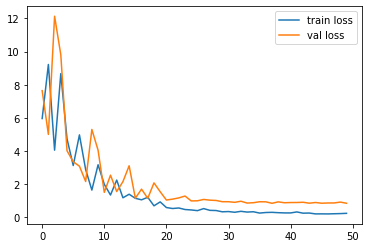

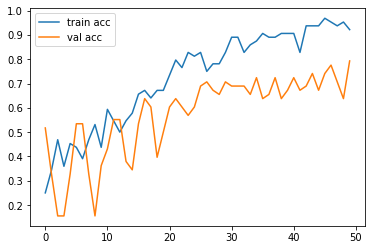

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)


In [19]:
y_pred

array([[2.4939504e-02, 2.0142190e-01, 7.7363861e-01],
       [4.5224750e-01, 3.6247593e-01, 1.8527652e-01],
       [4.9247634e-02, 3.9245838e-01, 5.5829394e-01],
       [6.5311743e-04, 9.9774569e-01, 1.6012073e-03],
       [3.2666302e-01, 4.7286761e-01, 2.0046940e-01],
       [9.7641844e-01, 1.5007571e-02, 8.5740602e-03],
       [7.3070759e-01, 2.6761061e-01, 1.6817752e-03],
       [9.7793508e-03, 5.6792922e-02, 9.3342775e-01],
       [1.6751394e-03, 7.5414860e-01, 2.4417630e-01],
       [3.5541248e-02, 8.0503321e-01, 1.5942554e-01],
       [1.3279285e-01, 7.7811396e-01, 8.9093193e-02],
       [1.6916575e-02, 8.1888956e-01, 1.6419391e-01],
       [2.2657346e-02, 7.5485140e-01, 2.2249128e-01],
       [1.2071785e-01, 5.2063078e-01, 3.5865140e-01],
       [2.1834423e-01, 7.6100975e-01, 2.0645985e-02],
       [1.0974677e-02, 9.8839474e-01, 6.3065405e-04],
       [9.5281832e-02, 2.1389492e-02, 8.8332862e-01],
       [9.1460598e-01, 5.5595174e-02, 2.9798891e-02],
       [2.6872009e-04, 9.959

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0,
       2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model


In [23]:
model=load_model('model_resnet50.h5')

In [24]:
img=image.load_img('Datasets/Test/audi/24.jpg',target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[225., 225., 225.],
        [226., 226., 226.],
        [228., 228., 228.],
        ...,
        [ 98.,  94.,  46.],
        [ 98.,  94.,  46.],
        [ 98.,  94.,  46.]],

       [[223., 223., 223.],
        [224., 224., 224.],
        [226., 226., 226.],
        ...,
        [112., 104.,  65.],
        [109., 101.,  62.],
        [106.,  98.,  59.]],

       [[221., 221., 221.],
        [222., 222., 222.],
        [223., 223., 223.],
        ...,
        [ 64.,  55.,  26.],
        [ 64.,  55.,  26.],
        [ 65.,  56.,  27.]],

       ...,

       [[145., 120., 100.],
        [142., 117.,  97.],
        [148., 123., 103.],
        ...,
        [108.,  86.,  75.],
        [108.,  86.,  75.],
        [108.,  86.,  75.]],

       [[148., 120.,  98.],
        [138., 111.,  90.],
        [138., 111.,  90.],
        ...,
        [120.,  96.,  84.],
        [114.,  90.,  78.],
        [107.,  83.,  71.]],

       [[148., 120.,  98.],
        [138., 111.,  90.],
        [138., 1

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[0.04740399, 0.05647542, 0.89612055]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a==1

array([False])